In [1]:

seed_val = 1304

import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(seed_val)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

tf.random.set_seed(seed_val)
np.random.seed(seed_val)
random.seed(seed_val)

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, regularizers
from sklearn import ensemble

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


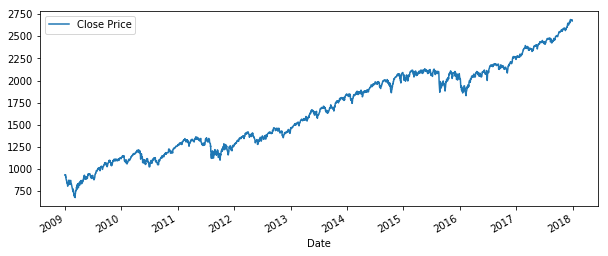

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df.plot(x='Date', y='Close Price',legend=True,figsize=(10,4))

## Features
### Mid Price
- 取最高價與最低價的中間值

In [4]:
df['Mid Price'] = (df['High Price'] + df['Low Price']) / 2
df_test['Mid Price'] = (df_test['High Price'] + df_test['Low Price']) / 2
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Mid Price
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080,917.040
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016,928.080
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032,935.565
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032,914.910
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952,903.405


### Up Down
- 作為ground truth，不當作訓練的特徵

In [5]:
df['Up Down'] = np.where(df['Close Price'].shift(1) > df['Close Price'], 0, 1)
df_test['Up Down'] = np.where(df_test['Close Price'].shift(1) > df_test['Close Price'], 0, 1)
df.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Mid Price,Up Down
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080,917.040,1
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016,928.080,0
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032,935.565,1
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032,914.910,0
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952,903.405,1


### VolumeBand
- 依據漲跌結果，將Volume分五等分，觀察漲跌機率，發現第五等分的上漲機率最低。

In [6]:
df['VolumeBand'] = pd.cut(df['Volume'], 5)
df[['VolumeBand', 'Up Down']].groupby( ['VolumeBand'], as_index=False).mean().sort_values(by='VolumeBand', ascending=True)

,VolumeBand,Up Down
0,"(509556458.048, 2238546790.4]",0.561529
1,"(2238546790.4, 3958935180.8]",0.540488
2,"(3958935180.8, 5679323571.2]",0.545802
3,"(5679323571.2, 7399711961.6]",0.563636
4,"(7399711961.6, 9120100352.0]",0.366667


- 將所有在第五等分的的VolumeBand=1，反之為0。

In [7]:
df['High Volume'] = np.where(df['Volume'] > 7399811961.6, 1, 0)
df = df.drop('VolumeBand', axis=1)
df_test['High Volume'] = np.where(df_test['Volume'] > 7399811961.6, 1, 0)
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Mid Price,Up Down,High Volume
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080,917.040,1,0
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016,928.080,0,0
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032,935.565,1,0
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032,914.910,0,0
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952,903.405,1,0


## Select Features and Define Train/Test Data

In [8]:
feature = ['Open Price', 'Close Price', 'Mid Price', 'High Volume']

x = df[feature]
y = df['Up Down']

x_test = df_test[feature]
y_test = df_test['Up Down']

## Train and Test in Different Classifiers
### Logistic Regression

In [9]:
lr = LogisticRegression(random_state=1200, solver='lbfgs', multi_class='multinomial').fit(x, y)
lr.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [10]:
lr.predict_proba(x_test)

array([[5.50210663e-05, 9.99944979e-01],
       [3.60516632e-06, 9.99996395e-01],
       [1.16664008e-02, 9.88333599e-01],
       [7.91320826e-05, 9.99920868e-01],
       [1.95063626e-02, 9.80493637e-01],
       [3.17790872e-01, 6.82209128e-01],
       [1.42094940e-01, 8.57905060e-01],
       [6.67700733e-06, 9.99993323e-01],
       [1.84296180e-06, 9.99998157e-01],
       [9.99999980e-01, 2.02825418e-08],
       [7.26282216e-07, 9.99999274e-01],
       [9.68226165e-01, 3.17738355e-02],
       [2.39718905e-03, 9.97602811e-01],
       [4.44506812e-09, 9.99999996e-01],
       [3.20229506e-02, 9.67977049e-01],
       [9.98493876e-01, 1.50612373e-03],
       [9.97141941e-01, 2.85805867e-03],
       [1.28731820e-09, 9.99999999e-01],
       [9.99974748e-01, 2.52523135e-05],
       [9.99635990e-01, 3.64009805e-04],
       [9.99055793e-01, 9.44207306e-04],
       [3.77518591e-03, 9.96224814e-01],
       [1.00000000e+00, 5.83309676e-17],
       [1.00000000e+00, 3.34943228e-32],
       [3.596053

In [11]:
lr_acc = lr.score(x_test,y_test)
print(lr_acc)

0.8214285714285714


### Neural Networks

In [12]:
nn = models.Sequential()
nn.add(layers.Dense(12, input_shape=(4,), activation='relu'))
nn.add(layers.Dense(12, activation='relu'))
nn.add(layers.Dense(12, activation='relu'))
nn.add(layers.Dense(1, activation='sigmoid'))

from keras.optimizers import SGD
opt = SGD(lr=0.0001)
nn.compile( optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
nn.fit(x, y, epochs=20, batch_size=3)

Epoch 1/20
2264/2264 [==============================] - 1s 354us/step - loss: 1.4826 - accuracy: 0.5133
Epoch 2/20
2264/2264 [==============================] - 1s 291us/step - loss: 0.6829 - accuracy: 0.5786
Epoch 3/20
2264/2264 [==============================] - 1s 307us/step - loss: 0.6652 - accuracy: 0.6087
Epoch 4/20
2264/2264 [==============================] - 1s 318us/step - loss: 0.6693 - accuracy: 0.5972
Epoch 5/20
2264/2264 [==============================] - 1s 301us/step - loss: 0.6671 - accuracy: 0.6113
Epoch 6/20
2264/2264 [==============================] - 1s 289us/step - loss: 0.6615 - accuracy: 0.6175
Epoch 7/20
2264/2264 [==============================] - 1s 293us/step - loss: 0.6622 - accuracy: 0.5998
Epoch 8/20
2264/2264 [==============================] - 1s 273us/step - loss: 0.6680 - accuracy: 0.6029
Epoch 9/20
2264/2264 [==============================] - 1s 274us/step - loss: 0.6591 - accuracy: 0.6325
Epoch 10/20
2264/2264 [==============================] - 1s 269u

In [13]:
nn.predict(x_test)

array([[0.5415915 ],
       [0.5554845 ],
       [0.50038916],
       [0.54104286],
       [0.5077704 ],
       [0.477703  ],
       [0.4975525 ],
       [0.55285394],
       [0.5592293 ],
       [0.3690507 ],
       [0.5685066 ],
       [0.4588437 ],
       [0.5207626 ],
       [0.5980399 ],
       [0.5004341 ],
       [0.4430049 ],
       [0.44790033],
       [0.60553586],
       [0.4103609 ],
       [0.42746356],
       [0.43877897],
       [0.5007004 ],
       [0.26588333],
       [0.14802524],
       [0.8283614 ],
       [0.412152  ],
       [0.15165175],
       [0.59955746],
       [0.575205  ],
       [0.565842  ],
       [0.70485044],
       [0.5826723 ],
       [0.493007  ],
       [0.44336966],
       [0.3700513 ],
       [0.43899408],
       [0.63551867],
       [0.59172803],
       [0.30398202],
       [0.28895998],
       [0.3042988 ],
       [0.642738  ],
       [0.67185974],
       [0.47888494],
       [0.56592464],
       [0.516445  ],
       [0.6450982 ],
       [0.440

In [14]:
loss, nn_acc = nn.evaluate(x_test, y_test)
print(nn_acc)

252/252 [==============================] - 0s 75us/step
0.8015872836112976


### Adaboost

In [15]:
boost = ensemble.AdaBoostClassifier(
    base_estimator=lr, n_estimators=100, learning_rate=2.0, random_state=2000
).fit(x, y)
boost.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [16]:
boost.predict_proba(x_test)

array([[0.49158398, 0.50841602],
       [0.48889084, 0.51110916],
       [0.49658585, 0.50341415],
       [0.49202857, 0.50797143],
       [0.49739939, 0.50260061],
       [0.50016839, 0.49983161],
       [0.49952694, 0.50047306],
       [0.48957233, 0.51042767],
       [0.48830652, 0.51169348],
       [0.51812206, 0.48187794],
       [0.48752148, 0.51247852],
       [0.5044442 , 0.4955558 ],
       [0.49541665, 0.50458335],
       [0.48259795, 0.51740205],
       [0.49787082, 0.50212918],
       [0.50754395, 0.49245605],
       [0.50695145, 0.49304855],
       [0.48144543, 0.51855457],
       [0.51129692, 0.48870308],
       [0.50871447, 0.49128553],
       [0.50794468, 0.49205532],
       [0.49540565, 0.50459435],
       [0.53711458, 0.46288542],
       [0.5700547 , 0.4299453 ],
       [0.44081677, 0.55918323],
       [0.50373333, 0.49626667],
       [0.58029952, 0.41970048],
       [0.49274024, 0.50725976],
       [0.48560801, 0.51439199],
       [0.48824795, 0.51175205],
       [0.

In [17]:
boost_acc = boost.score(x_test,y_test)
print(boost_acc)

0.8373015873015873
